<a href="https://colab.research.google.com/github/AlexxxisDxlgxdx/M-todos-numericos/blob/main/Metodos(Tarea).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

En el centro de una ciudad se desea construir un tranvia moderno que pase por los ocho puntos turisticos, por lo que tendria ocho paradas, que se indican a continuacion.

|Puntos|Posicion x| Posicion y
|:---:|:---:|:---:|
|Primero|0|20|
|Segundo|1.5|100|
|Tercero|3|60|
|Cuarto|4|120|
|Quinto|6|20|
|Sexto|7|40|
|Septimo|9|100|
|Octavo|10|0|


In [45]:
import numpy as np
import matplotlib.pyplot as plt

## Datos

In [66]:
x_values = [0, 1.5, 3, 4, 6, 7, 9, 10]
y_values = [20, 100, 60, 120, 20, 40, 100, 0]

## Pregunta 1
**Representa en una grafica los puntos turisticos**

**solución.**

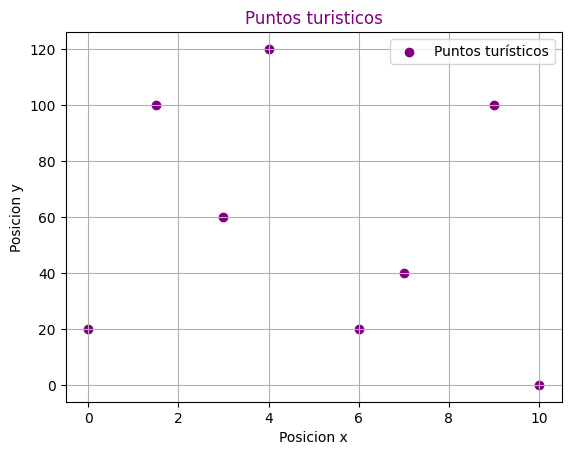

In [68]:
plt.scatter(x_values, y_values, color = 'purple', label = 'Puntos turísticos')
plt.legend()
plt.xlabel('Posicion x')
plt.ylabel('Posicion y')
plt.title('Puntos turisticos', color = 'purple')
plt.grid(True)
plt.show()

## Pregunta 2  
**Como primera aproximacion, vamos a realizar una interpolacion lineal entre cada pareja de puntos contiguos.**
 - **Obten la expresion de l(x)**
 $$
 l(x) =
\begin{cases}
l_0(x) & \text{if } x \in [0, 1.5] \\
l_1(x) & \text{if } x \in [1.5, 3] \\
  \vdots & \vdots \\
l_6(x) & \text{if } x \in [9, 10] \\
\end{cases}
 $$

 - **Representa el polinomio a trozos junto con los puntos turisticos**
 - **Comente con respecto a los cambios de pendiente de la trayectoria**

**solución.**

**Obtenemos polinomio**


In [69]:
import numpy as np
from numpy.polynomial import Polynomial

def lineal_spline(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)

    CS = []
    for i in range(n-1):
        itr, _ = newton(X[i:i+2], Y[i:i+2])
        CS.append(itr)
    return CS

def eval_spline(CS, X, I):
    X = np.array(X)
    I = np.array(I)
    n = len(X)

    R = np.zeros(I.shape)
    for i in range(n-1):
        C = (X[i] <= I) & (I <= X[i+1])
        R[C] = CS[i](I[C])
    return R

**Representación y puntos**

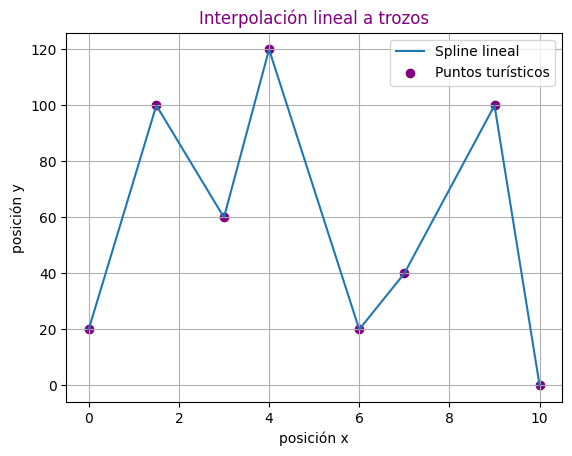

In [73]:
SC = lineal_spline(x_values, y_values)
I = np.linspace(min(x_values), max(x_values), 500)
R = eval_spline(SC, x_values, I)
plt.plot(I, R, label="Spline lineal")
plt.xlabel('posición x')
plt.ylabel('posición y')
plt.title('Interpolación lineal a trozos',  color ='purple')
plt.scatter(x_values, y_values, label='Puntos turísticos', color = 'purple')
plt.legend()
plt.grid()
plt.show()

**Comentario:**
- Se puede Observar en la gráfica de la interpolación lineal una falta de suavidad, ya que presenta  cambios abruptos de pendiente en los puntos donde se conectan dos segmentos. Esto significa que la trayectoria del tranvía cambiaría de dirección de manera brusca en cada parada turística, lo cual podría generar movimientos poco naturales. Por lo que no representa una trayectoria realista.



## Pregunta 3
**Obten el polinomio de interpolacion de Newton n(x) de grado siete que pasa por los ocho paradas, utilizando dos decimales.**
- **Representa el polinomio junto con los puntos de las paradas.**
- **Comente sobre recorrido que tendria que hacer el tranvia de una parada a otra**

**solución.**



**Obtenemos polinomio**




In [51]:
import numpy as np
from numpy.polynomial import Polynomial

# x: Lista de los nodos de la interpolación
# y: Lista de los valores de la interpolación
# return:
#   itr: El polinomio de interpolación
#   L: Lista que contiene los polinomios base
def lagrange(x, y):
    n = len(x)
    # Calculamos los polinomios base
    L = []
    itr = Polynomial(0)
    for i in range(n):
        base = Polynomial([1])
        for j in range(n):
            if j != i:
                factor = Polynomial([-x[j], 1])/(x[i]-x[j])
                base = base * factor
        L.append(base)
        itr += y[i] * base
    return itr, L

# x: Lista de los nodos de la interpolación
# y: Lista de los valores de la interpolación
# return:
#   itr: El polinomio de interpolación
#   N: Matriz que representa la tabla de diferencias divididas
def newton(x, y):
    n = len(x)
    N = np.zeros((n, n))
    # Completamos la tabla de diferencias divididas
    N[0,:] = y
    for i in range(1,n):
        for j in range(n-i):
            top = N[i-1,j] - N[i-1,j+1]
            bottom = x[j] - x[j+i]
            N[i,j] = top/bottom
    # Calculamos los polinomios base
    itr = Polynomial(0)
    for i in range(n):
        base = Polynomial([1])
        for j in range(i):
            factor = Polynomial([-x[j], 1])
            base = base * factor
        itr += N[i,0] * base



    return itr, N

def forward_differences(Y):
    n = len(Y)
    F = np.zeros((n,n))
    F[0,:] = Y
    for i in range(1,n):
        for j in range(0, n-i):
            diff = F[i-1,j+1] - F[i-1,j]
            F[i,j] = diff
    return F

def backward_differences(Y):
    n = len(Y)
    F = np.zeros((n,n))
    F[0,:] = Y
    for i in range(1,n):
        for j in range(i, n):
            diff = F[i-1,j] - F[i-1,j-1]
            F[i,j] = diff
    return F

In [52]:
#Valores de posición
x = [0, 1.5, 3, 4, 6, 7, 9, 10]
y = [20, 100, 60, 120, 20, 40, 100, 0]

# Obtenemos el polinomio interpolador de Newton
polinomio, tabla_diferencias = newton(x, y)

# Redondeamos los coeficientes a dos decimales
coef_redondeados = np.round(polinomio.coef, 2)

# Creamos un nuevo polinomio con los coeficientes redondeados
polinomio_redondeado = Polynomial(coef_redondeados)
print("Polinomio de interpolación de Newton:")
print(polinomio_redondeado)

Polinomio de interpolación de Newton:
20.0 + 971.05·x - 1339.7·x² + 712.73·x³ - 185.97·x⁴ + 25.38·x⁵ - 1.74·x⁶ +
0.05·x⁷



**Representación y puntos**

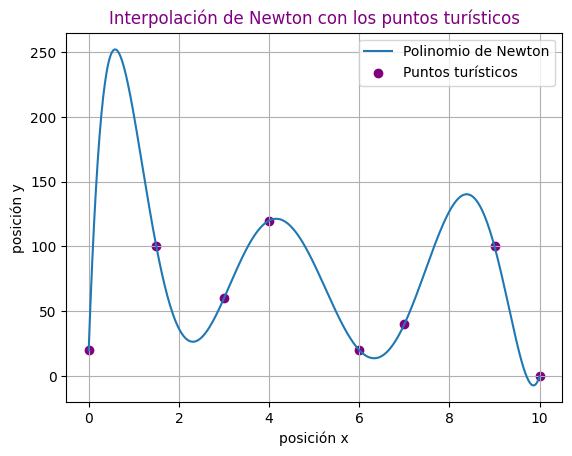

In [53]:
import matplotlib.pyplot as plt

x_vals = np.linspace(min(x), max(x), 500)
y_vals = polinomio(x_vals)

plt.plot(x_vals, y_vals, label = 'Polinomio de Newton')
plt.scatter(x, y, color='purple', label="Puntos turísticos")
plt.xlabel('posición x')
plt.ylabel('posición y')
plt.title('Interpolación de Newton con los puntos turísticos', color = 'purple')
plt.legend()
plt.grid()
plt.show()

**Comentario:**
- Se puede observar en la gráfica que el polinomio de interpolación de Newton pasa por todas las paradas, garantizando que el tranvía se detenga en cada punto turístico. Sin embargo, debido a la naturaleza del polinomio de grado alto (grado 7), se presenta el fenómeno Runge y el recorrido muestra varias oscilaciones entre las paradas, especialmente cerca de la posición 0 y 1.5, así como entre 6 y 9, lo que sugiere que el tranvía tomaría un camino no muy suave, con cambios bruscos de dirección a lo largo de la ruta. Por lo que  no representa un trayecto eficiente o realista para un tranvía.


## Pregunta 4
**Obten el polinomio de hermite h(x) de grado 15 que pasa por las ocho paradas considerando como derivada en cada punto el valor 0 (Redondea los coeficientes al entero mas proximo (resultara en un polinomio de grado 12).**
**Representa el polinomio junto con las ubicaciones de las paradas. Comenta sobre la trayectoria que tendrá que realizar el tranvıa.**


**solución**

**Obtenemos polinomio**

In [54]:
import numpy as np
from numpy.polynomial import Polynomial


# X: Lista de los nodos de la interpolación
# Y: Lista de los valores de la interpolación
# DY: Lista de las derivadas de la interpolación
# return:
#   itr: El polinomio de interpolación
#   H, DH: Listas que contienen los polinomios base
def hermite(X, Y, DY):
    n = len(X)
    _, L = lagrange(X, Y)
    DL = [p.deriv() for p in L]
    H = []
    S1 = Polynomial(0)
    for i in range(n):
        r = (Polynomial(1)-2*Polynomial([-X[i],1])*DL[i](X[i]))*L[i]**2
        S1 += Y[i]*r
        H.append(r)

    DH = []
    S2 = Polynomial(0)
    for i in range(n):
        r = Polynomial([-X[i],1])*L[i]**2
        S2 += DY[i]*r
        DH.append(r)
    itr = S1 + S2
    return itr, H, DH

# X: Lista de los nodos de la interpolación
# Y: Lista de los valores de la interpolación
# DY: Lista de las derivadas de la interpolación
# return:
#   itr: El polinomio de interpolación
#   H: La tabla de diferencias divididas
def hermite_table(X, Y, DY):
    n = len(X)
    # Rellenamos el array de los z_i
    Z = np.zeros(2*n)
    for i in range(n):
        Z[2*i:2*i+2] = [X[i], X[i]]
    # Creamos la tabla de diferencias divididas
    H = np.zeros((2*n, 2*n))
    # Rellenamos con los valores
    for i in range(n):
        H[0, 2*i:2*i+2] = [Y[i], Y[i]]
    # Rellenamos con las derivadas
    for i in range(n):
        H[1, 2*i] = DY[i]
    # Rellenamos con las diferencias divididas
    for i in range(1, 2*n):
        for j in range(2*n-i):
            if i == 1 and j % 2 == 0:
                continue
            top = H[i-1,j] - H[i-1,j+1]
            bottom = Z[j] - Z[j+i]
            H[i,j] = top/bottom
    # Calculamos los polinomios base
    itr = Polynomial(0)
    for i in range(2*n):
        base = Polynomial([1])
        for j in range(i):
            factor = Polynomial([-Z[j], 1])
            base = base * factor
        itr += H[i,0] * base

    return itr, H

In [55]:
# valores de posiciones
X = [0, 1.5, 3, 4, 6, 7, 9, 10]
Y = [20, 100, 60, 120, 20, 40, 100, 0]
DY = [0, 0, 0, 0, 0, 0, 0, 0]

# Otenemos polinomio de interpolación de Hermite
itr, H, DH = hermite(X, Y, DY)

# Redondeamos los coeficientes al entero más cercano
itr_rounded = Polynomial(np.round(itr.coef))

# Mostramos el polinomio resultante
print("Polinomio de interpolación de Hermite:")
print(itr_rounded)

Polinomio de interpolación de Hermite:
20.0 + 0.0·x + 23329.0·x² - 75580.0·x³ + 107883.0·x⁴ - 89841.0·x⁵ +
48839.0·x⁶ - 18368.0·x⁷ + 4935.0·x⁸ - 962.0·x⁹ + 137.0·x¹⁰ - 14.0·x¹¹ +
1.0·x¹² + -0.0·x¹³ + 0.0·x¹⁴ + -0.0·x¹⁵


**Representación y puntos**

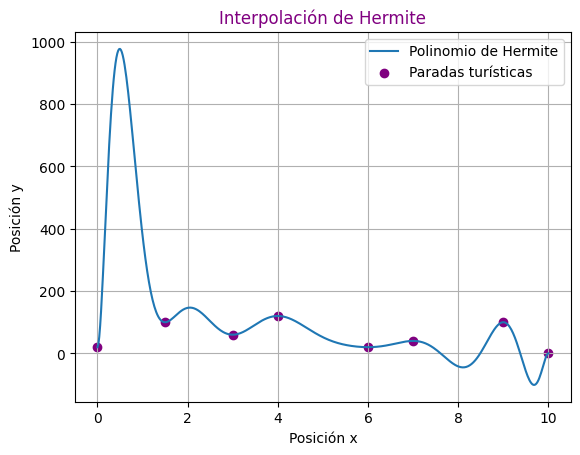

In [56]:
import matplotlib.pyplot as plt

# Crear valores para x para graficar el polinomio
x_vals = np.linspace(min(X), max(X), 500)
y_vals = itr(x_vals)

# Graficar
plt.plot(x_vals, y_vals, label="Polinomio de Hermite")
plt.scatter(X, Y, color='purple', label="Paradas turísticas")
plt.title("Interpolación de Hermite", color = 'purple')
plt.xlabel("Posición x")
plt.ylabel("Posición y")
plt.legend()
plt.grid(True)
plt.show()

**Comentario:**
- Se puede Observar en la graficá que el polinomio de Hermite pasa por todas las paradas. Lo que garantiza que el tranvía se dentendrá en cada punto turístico. Pero, El polinómio al ser de grado 12 presenta el Fenómeno Runge donde se puede obrservar oscilaciones muy grandes, incluso mayores que la del polinomio interpolador de Newton en la pregunta 3. Esto se puede observar especialmente cerca de los puntos 0, 1.5 y 10. Lo que sugiere cambios abruptos en la dirección y velocidad del tranvía. Estos cambios son poco realistas y eficientes para el diseño de un tranvía.



## Pregunta 5
Utilice Splines naturales cubicos $s(x)$ que pasan por las ocho paradas, es decir obten la
expresion de $s_i(x) \quad\forall i = 0, 1, . . . 6$, donde
$$
s(x) =
\begin{cases}
s_0(x) & \text{if } x \in [0, 1.5] \\
s_1(x) & \text{if } x \in [1.5, 3] \\
  \vdots & \vdots \\
s_6(x) & \text{if } x \in [9, 10] \\
\end{cases}
$$
**Utilice dos decimales.**
- **Representa el polinomio junto con las paradas.**
- **Comente sobre la trayectoria.**

**solución**

**Obtenemos polinomio**

In [58]:
import numpy as np
from numpy.polynomial import Polynomial

def natural_cubic_spline(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)

    # Calculamos los a_j
    A = Y[:]

    # Calculamos los h_j
    H = X[1:] - X[:-1]

    # Calculamos los c_j
    M = np.zeros((n, n))
    M[0,0] = 1
    M[-1,-1] = 1
    for i in range(1, n-1):
        M[i,i-1] = H[i-1]
        M[i,i+1] = H[i]
        M[i,i] = 2*(H[i-1]+H[i])
    b = np.zeros(n)
    for i in range(1, n-1):
        b[i] = 3/H[i]*(A[i+1]-A[i]) - 3/H[i-1]*(A[i]-A[i-1])
    C = np.linalg.solve(M, b)

    # Calculamos los b_j
    B = np.zeros(n-1)
    for i in range(n-1):
        B[i] = (A[i+1]-A[i])/H[i]-(2*C[i]+C[i+1])*H[i]/3

    # Calculamos los d_j
    D = np.zeros(n-1)
    for i in range(n-1):
        D[i] = (C[i+1]-C[i])/(3*H[i])

    # Debemos hallar el trazador de la forma:
    # S_j(x) = a_j + b_j*(x-x_j) + c_j*(x-x_j)^2 + d_j*(x-x_j)^3
    CS = []
    for i in range(n-1):
        p = A[i] + B[i]*Polynomial([-X[i], 1]) + C[i]*Polynomial([-X[i], 1])**2 + D[i]*Polynomial([-X[i], 1])**3
        CS.append(p)
    return CS

def eval_spline(CS, X, I):
  X = np.array(X)
  I = np.array(I)
  n = len(X)

  R = np.zeros(I.shape)
  for i in range(n-1):
      C = (X[i] <= I) & (I <= X[i+1])
      R[C] = CS[i](I[C])
  return R

In [61]:
x_values = [0, 1.5, 3, 4, 6, 7, 9, 10]
y_values = [20, 100, 60, 120, 20, 40, 100, 0]



**Representación y puntos**

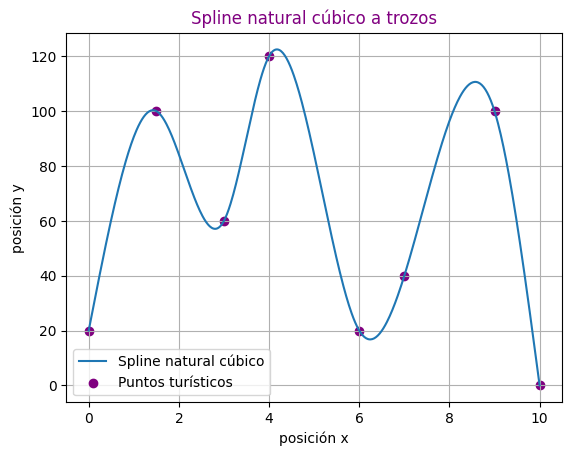

In [72]:
SC = natural_cubic_spline(x_values, y_values)
I = np.linspace(min(x_values), max(x_values), 500)
R = eval_spline(SC, x_values, I)
plt.plot(I, R, label="Spline natural cúbico")
plt.xlabel('posición x')
plt.ylabel('posición y')
plt.title('Spline natural cúbico a trozos',  color ='purple')
plt.scatter(x_values, y_values, label='Puntos turísticos', color = 'purple')
plt.legend()
plt.grid()
plt.show()

**Comentario:**
- Se puede observar en la gráfica que el Spline cúbico natural respresenta la trayectoria mas efciente y realista. Puesto que no aparece el fenómeno Runge y la trayectoria del tranvía presenta una curva suave entre cada par de puntos turísticos, lo que implica que la trayectoria del tranvía será fluida, sin cambios bruscos en la dirección ni en la pendiente.




## Pregunta 6
**Representa en una sola grafica los polinomios de interpolacion obtenidos. Comente**